In [1]:
# Import required libraries and dependencies
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import hvplot.pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Loading the Dataset from CSV

In [3]:
# Load the data into a Pandas DataFrame
df = pd.read_csv("heart_2022_with_nans.csv")
# Display sample data
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


# 2. Exploring the Dataset

<Axes: >

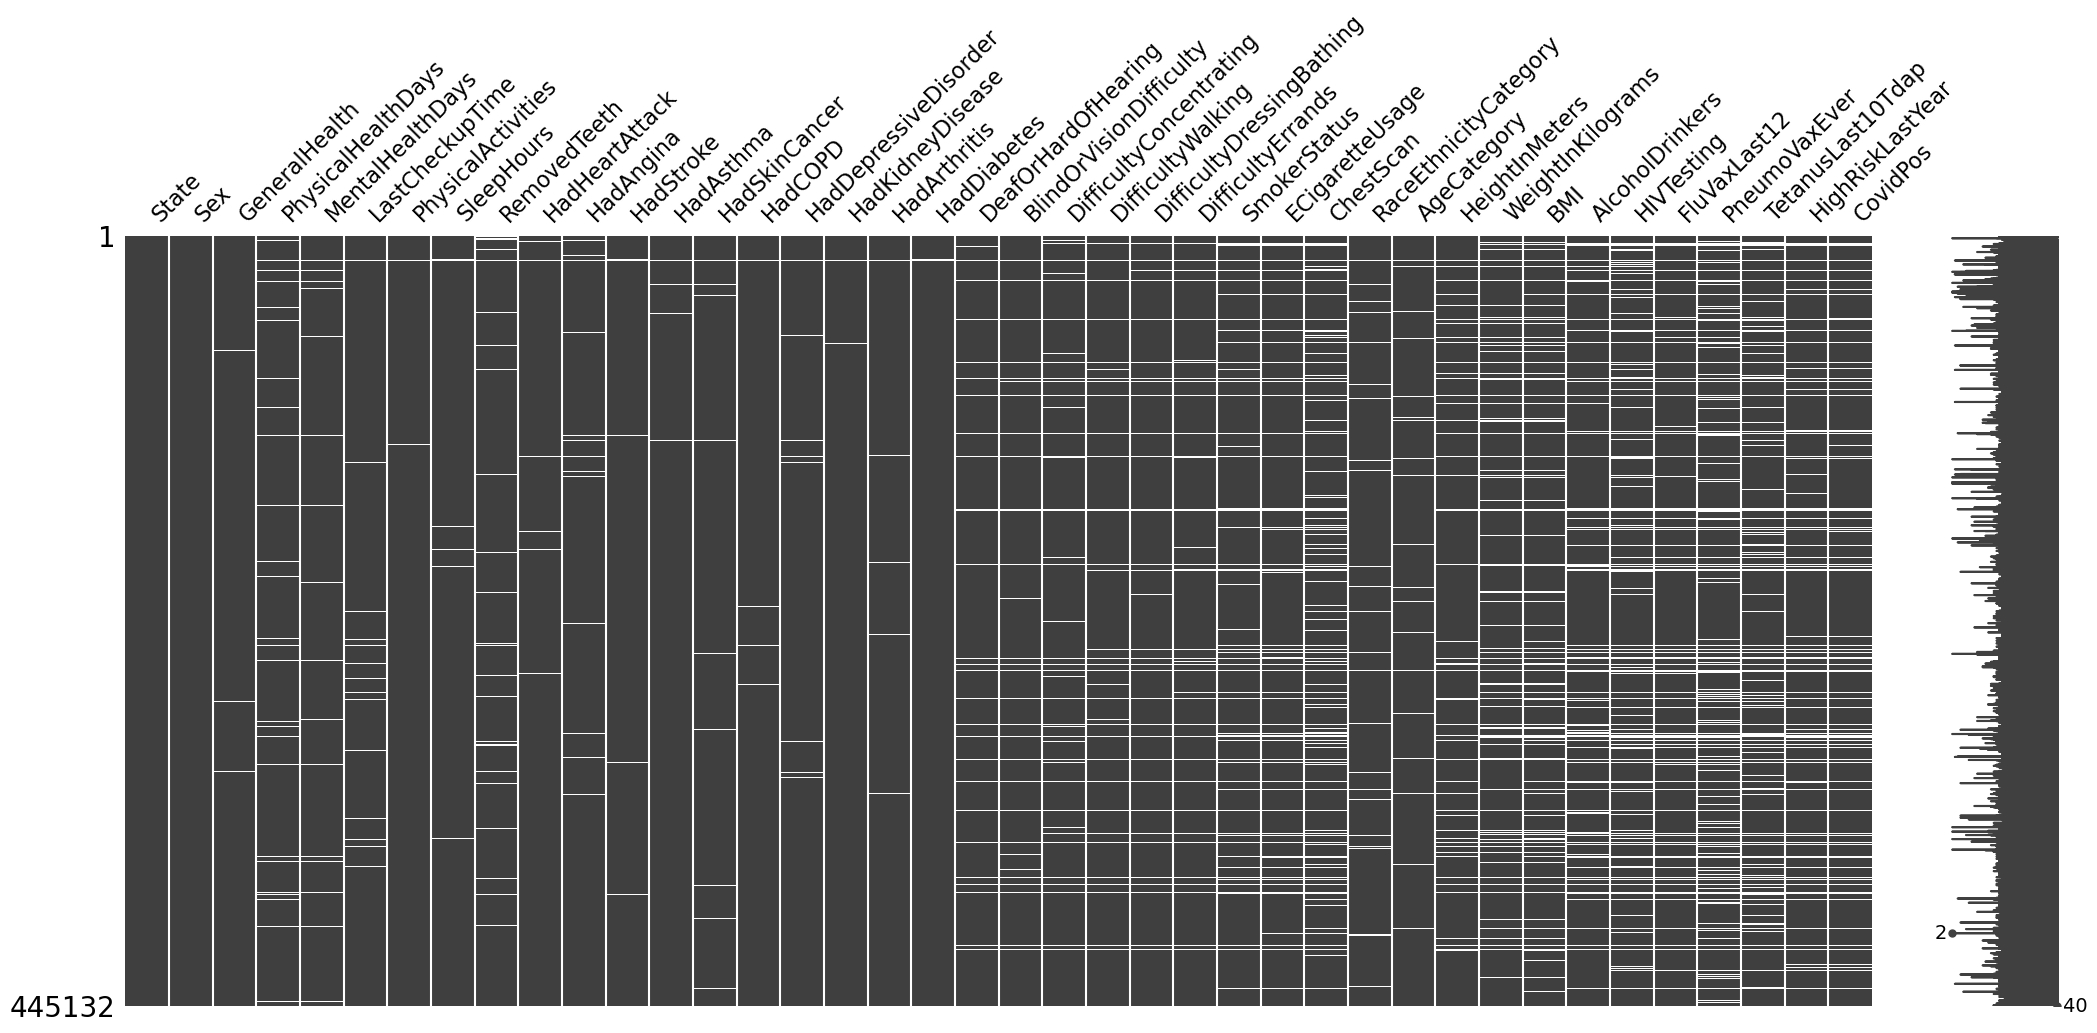

In [4]:
# Check he missing data
%matplotlib inline
msno.matrix(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [6]:
# Finding NAN values
nan_values = df.isna().sum().sort_values(ascending=False)
nan_values_percentage = (nan_values/df.shape[0])*100

# Output the DataFrame with two columns nan_values and nan_values_percentage
pd.concat([nan_values, nan_values_percentage], axis=1).rename(columns= {0:"NaN Values", 1:"(%) of NaN Values"}).round(2)

,NaN Values,(%) of NaN Values
TetanusLast10Tdap,82516,18.54
PneumoVaxEver,77040,17.31
HIVTesting,66127,14.86
ChestScan,56046,12.59
CovidPos,50764,11.40
HighRiskLastYear,50623,11.37
BMI,48806,10.96
FluVaxLast12,47121,10.59
AlcoholDrinkers,46574,10.46
WeightInKilograms,42078,9.45


In [7]:
# Gets the column names
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [11]:

# Statistical Analysis for numerical data in dataset
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [13]:
# Identify binary columns
# The condition checks if the column has exactly 2 unique values using the nunique() 
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
binary_cols

['Sex',
 'PhysicalActivities',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'ChestScan',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'HighRiskLastYear']

In [17]:
# Convert and verify binary columns
all_binary = True

for col in binary_cols:
    unique_values = df[col].unique()
    if set(unique_values) != {0, 1}:
        mapping = {unique_values[0]: 0, unique_values[1]: 1}
        df[col] = df[col].map(mapping)
    
    # Verify conversion
    if set(df[col].unique()) != {0, 1}:
        all_binary = False
        print(f"Column {col} has non-binary values: {set(df[col].unique())}")

if all_binary:
    print("All binary columns have been successfully converted to 0 and 1.")
else:
    print("Some columns still have non-binary values.")

Column PhysicalActivities has non-binary values: {0.0, 1.0, nan}
Column HadHeartAttack has non-binary values: {0.0, 1.0, nan}
Column HadAngina has non-binary values: {0.0, 1.0, nan}
Column HadStroke has non-binary values: {0.0, 1.0, nan}
Column HadAsthma has non-binary values: {0.0, 1.0, nan}
Column HadSkinCancer has non-binary values: {0.0, 1.0, nan}
Column HadCOPD has non-binary values: {0.0, 1.0, nan}
Column HadDepressiveDisorder has non-binary values: {0.0, 1.0, nan}
Column HadKidneyDisease has non-binary values: {0.0, 1.0, nan}
Column HadArthritis has non-binary values: {0.0, 1.0, nan}
Column DeafOrHardOfHearing has non-binary values: {0.0, 1.0, nan}
Column BlindOrVisionDifficulty has non-binary values: {0.0, 1.0, nan}
Column DifficultyConcentrating has non-binary values: {0.0, 1.0, nan}
Column DifficultyWalking has non-binary values: {0.0, 1.0, nan}
Column DifficultyDressingBathing has non-binary values: {0.0, 1.0, nan}
Column DifficultyErrands has non-binary values: {0.0, 1.0, n

In [16]:
df_selected = df[['Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes']]
df_selected.corr()

ValueError: could not convert string to float: 'Female'

In [7]:
# Delete specific columns using drop()
columns_to_drop = [
    'LastCheckupTime', 'RemovedTeeth', 'HadCOPD', 
    'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating', 
    'DifficultyDressingBathing', 'DifficultyErrands', 
    'ECigaretteUsage', 'ChestScan', 
    'HeightInMeters', 'WeightInKilograms', 
    'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
    'HighRiskLastYear', 'CovidPos'
]
dropped_df = df.drop(columns=columns_to_drop)
dropped_df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,HadSkinCancer,HadDepressiveDisorder,HadKidneyDisease,HadDiabetes,DifficultyWalking,SmokerStatus,RaceEthnicityCategory,AgeCategory,BMI,AlcoholDrinkers
0,Alabama,Female,Very good,0.0,0.0,No,8.0,No,No,No,...,No,No,No,Yes,No,Never smoked,"White only, Non-Hispanic",Age 80 or older,NaN,No
1,Alabama,Female,Excellent,0.0,0.0,No,6.0,No,No,No,...,Yes,No,No,No,No,Never smoked,"White only, Non-Hispanic",Age 80 or older,26.57,No
2,Alabama,Female,Very good,2.0,3.0,Yes,5.0,No,No,No,...,Yes,No,No,No,No,Never smoked,"White only, Non-Hispanic",Age 55 to 59,25.61,No
3,Alabama,Female,Excellent,0.0,0.0,Yes,7.0,No,No,No,...,No,No,No,No,No,Current smoker - now smokes some days,"White only, Non-Hispanic",NaN,23.30,No
4,Alabama,Female,Fair,2.0,0.0,Yes,9.0,No,No,No,...,No,No,No,No,No,Never smoked,"White only, Non-Hispanic",Age 40 to 44,21.77,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Yes,6.0,No,No,No,...,No,Yes,No,No,No,Never smoked,"Black only, Non-Hispanic",Age 18 to 24,25.63,NaN
445128,Virgin Islands,Female,Excellent,2.0,2.0,Yes,7.0,No,No,No,...,No,No,No,No,No,Never smoked,"Black only, Non-Hispanic",Age 50 to 54,28.66,No
445129,Virgin Islands,Female,Poor,30.0,30.0,No,5.0,No,No,No,...,No,No,No,No,No,Current smoker - now smokes every day,NaN,Age 65 to 69,17.23,NaN
445130,Virgin Islands,Male,Very good,0.0,0.0,No,5.0,Yes,No,No,...,No,No,No,No,No,Never smoked,"Black only, Non-Hispanic",Age 70 to 74,32.55,No


In [8]:
dropped_df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'PhysicalActivities', 'SleepHours',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadDiabetes', 'DifficultyWalking', 'SmokerStatus',
       'RaceEthnicityCategory', 'AgeCategory', 'BMI', 'AlcoholDrinkers'],
      dtype='object')

In [9]:
# Reorganize columns order
column_order = [
        # User Info
        'State', 'Sex', 'AgeCategory', 'RaceEthnicityCategory','BMI', 
        # General health
        'GeneralHealth', 'PhysicalHealthDays','PhysicalActivities',
        'MentalHealthDays', 
        # risks
        'SleepHours', 'DifficultyWalking', 'SmokerStatus','AlcoholDrinkers', 
        # Medication History
        'HadAngina', 'HadHeartAttack',  'HadStroke', 'HadAsthma',
        'HadSkinCancer', 'HadDepressiveDisorder', 'HadKidneyDisease',
        'HadDiabetes', 
        ]
dropped_df = dropped_df[column_order]
dropped_df

,State,Sex,AgeCategory,RaceEthnicityCategory,BMI,GeneralHealth,PhysicalHealthDays,PhysicalActivities,MentalHealthDays,SleepHours,...,SmokerStatus,AlcoholDrinkers,HadAngina,HadHeartAttack,HadStroke,HadAsthma,HadSkinCancer,HadDepressiveDisorder,HadKidneyDisease,HadDiabetes
0,Alabama,Female,Age 80 or older,"White only, Non-Hispanic",NaN,Very good,0.0,No,0.0,8.0,...,Never smoked,No,No,No,No,No,No,No,No,Yes
1,Alabama,Female,Age 80 or older,"White only, Non-Hispanic",26.57,Excellent,0.0,No,0.0,6.0,...,Never smoked,No,No,No,No,No,Yes,No,No,No
2,Alabama,Female,Age 55 to 59,"White only, Non-Hispanic",25.61,Very good,2.0,Yes,3.0,5.0,...,Never smoked,No,No,No,No,No,Yes,No,No,No
3,Alabama,Female,NaN,"White only, Non-Hispanic",23.30,Excellent,0.0,Yes,0.0,7.0,...,Current smoker - now smokes some days,No,No,No,No,Yes,No,No,No,No
4,Alabama,Female,Age 40 to 44,"White only, Non-Hispanic",21.77,Fair,2.0,Yes,0.0,9.0,...,Never smoked,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Age 18 to 24,"Black only, Non-Hispanic",25.63,Good,0.0,Yes,3.0,6.0,...,Never smoked,NaN,No,No,No,Yes,No,Yes,No,No
445128,Virgin Islands,Female,Age 50 to 54,"Black only, Non-Hispanic",28.66,Excellent,2.0,Yes,2.0,7.0,...,Never smoked,No,No,No,No,No,No,No,No,No
445129,Virgin Islands,Female,Age 65 to 69,NaN,17.23,Poor,30.0,No,30.0,5.0,...,Current smoker - now smokes every day,NaN,No,No,No,No,No,No,No,No
445130,Virgin Islands,Male,Age 70 to 74,"Black only, Non-Hispanic",32.55,Very good,0.0,No,0.0,5.0,...,Never smoked,No,No,Yes,No,Yes,No,No,No,No


In [10]:
# Renaming columns using a dictionary
dropped_df = dropped_df.rename(columns={
    'AgeCategory': "Age", 
    'RaceEthnicityCategory': "Race",
    'GeneralHealth': "GenHealth",
    'PhysicalHealthDays': "PhysicalHealth",
    'PhysicalActivities': "PhysicalActivity",
    'MentalHealthDays': "MentalHealth",
    'HadAngina': "Angina",
    'HadHeartAttack': "HeartAttack",
    'HadStroke': "Stroking",
    'HadAsthma': "Asthma",
    'HadSkinCancer': "SkinCancer",
    'HadDepressiveDisorder': "Depressed",
    'HadKidneyDisease': "KidneyDisease",
    'DifficultyWalking': "DiffWalking",
    'HadDiabetes': "Diabetes",
    'SmokerStatus': "Smoking",
    'AlcoholDrinkers': "Alcohol"
})
dropped_df

,State,Sex,Age,Race,BMI,GenHealth,PhysicalHealth,PhysicalActivity,MentalHealth,SleepHours,...,Smoking,Alcohol,Angina,HeartAttack,Stroking,Asthma,SkinCancer,Depressed,KidneyDisease,Diabetes
0,Alabama,Female,Age 80 or older,"White only, Non-Hispanic",NaN,Very good,0.0,No,0.0,8.0,...,Never smoked,No,No,No,No,No,No,No,No,Yes
1,Alabama,Female,Age 80 or older,"White only, Non-Hispanic",26.57,Excellent,0.0,No,0.0,6.0,...,Never smoked,No,No,No,No,No,Yes,No,No,No
2,Alabama,Female,Age 55 to 59,"White only, Non-Hispanic",25.61,Very good,2.0,Yes,3.0,5.0,...,Never smoked,No,No,No,No,No,Yes,No,No,No
3,Alabama,Female,NaN,"White only, Non-Hispanic",23.30,Excellent,0.0,Yes,0.0,7.0,...,Current smoker - now smokes some days,No,No,No,No,Yes,No,No,No,No
4,Alabama,Female,Age 40 to 44,"White only, Non-Hispanic",21.77,Fair,2.0,Yes,0.0,9.0,...,Never smoked,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Age 18 to 24,"Black only, Non-Hispanic",25.63,Good,0.0,Yes,3.0,6.0,...,Never smoked,NaN,No,No,No,Yes,No,Yes,No,No
445128,Virgin Islands,Female,Age 50 to 54,"Black only, Non-Hispanic",28.66,Excellent,2.0,Yes,2.0,7.0,...,Never smoked,No,No,No,No,No,No,No,No,No
445129,Virgin Islands,Female,Age 65 to 69,NaN,17.23,Poor,30.0,No,30.0,5.0,...,Current smoker - now smokes every day,NaN,No,No,No,No,No,No,No,No
445130,Virgin Islands,Male,Age 70 to 74,"Black only, Non-Hispanic",32.55,Very good,0.0,No,0.0,5.0,...,Never smoked,No,No,Yes,No,Yes,No,No,No,No


In [11]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             445132 non-null  object 
 1   Sex               445132 non-null  object 
 2   Age               436053 non-null  object 
 3   Race              431075 non-null  object 
 4   BMI               396326 non-null  float64
 5   GenHealth         443934 non-null  object 
 6   PhysicalHealth    434205 non-null  float64
 7   PhysicalActivity  444039 non-null  object 
 8   MentalHealth      436065 non-null  float64
 9   SleepHours        439679 non-null  float64
 10  DiffWalking       421120 non-null  object 
 11  Smoking           409670 non-null  object 
 12  Alcohol           398558 non-null  object 
 13  Angina            440727 non-null  object 
 14  HeartAttack       442067 non-null  object 
 15  Stroking          443575 non-null  object 
 16  Asthma            44

<Axes: >

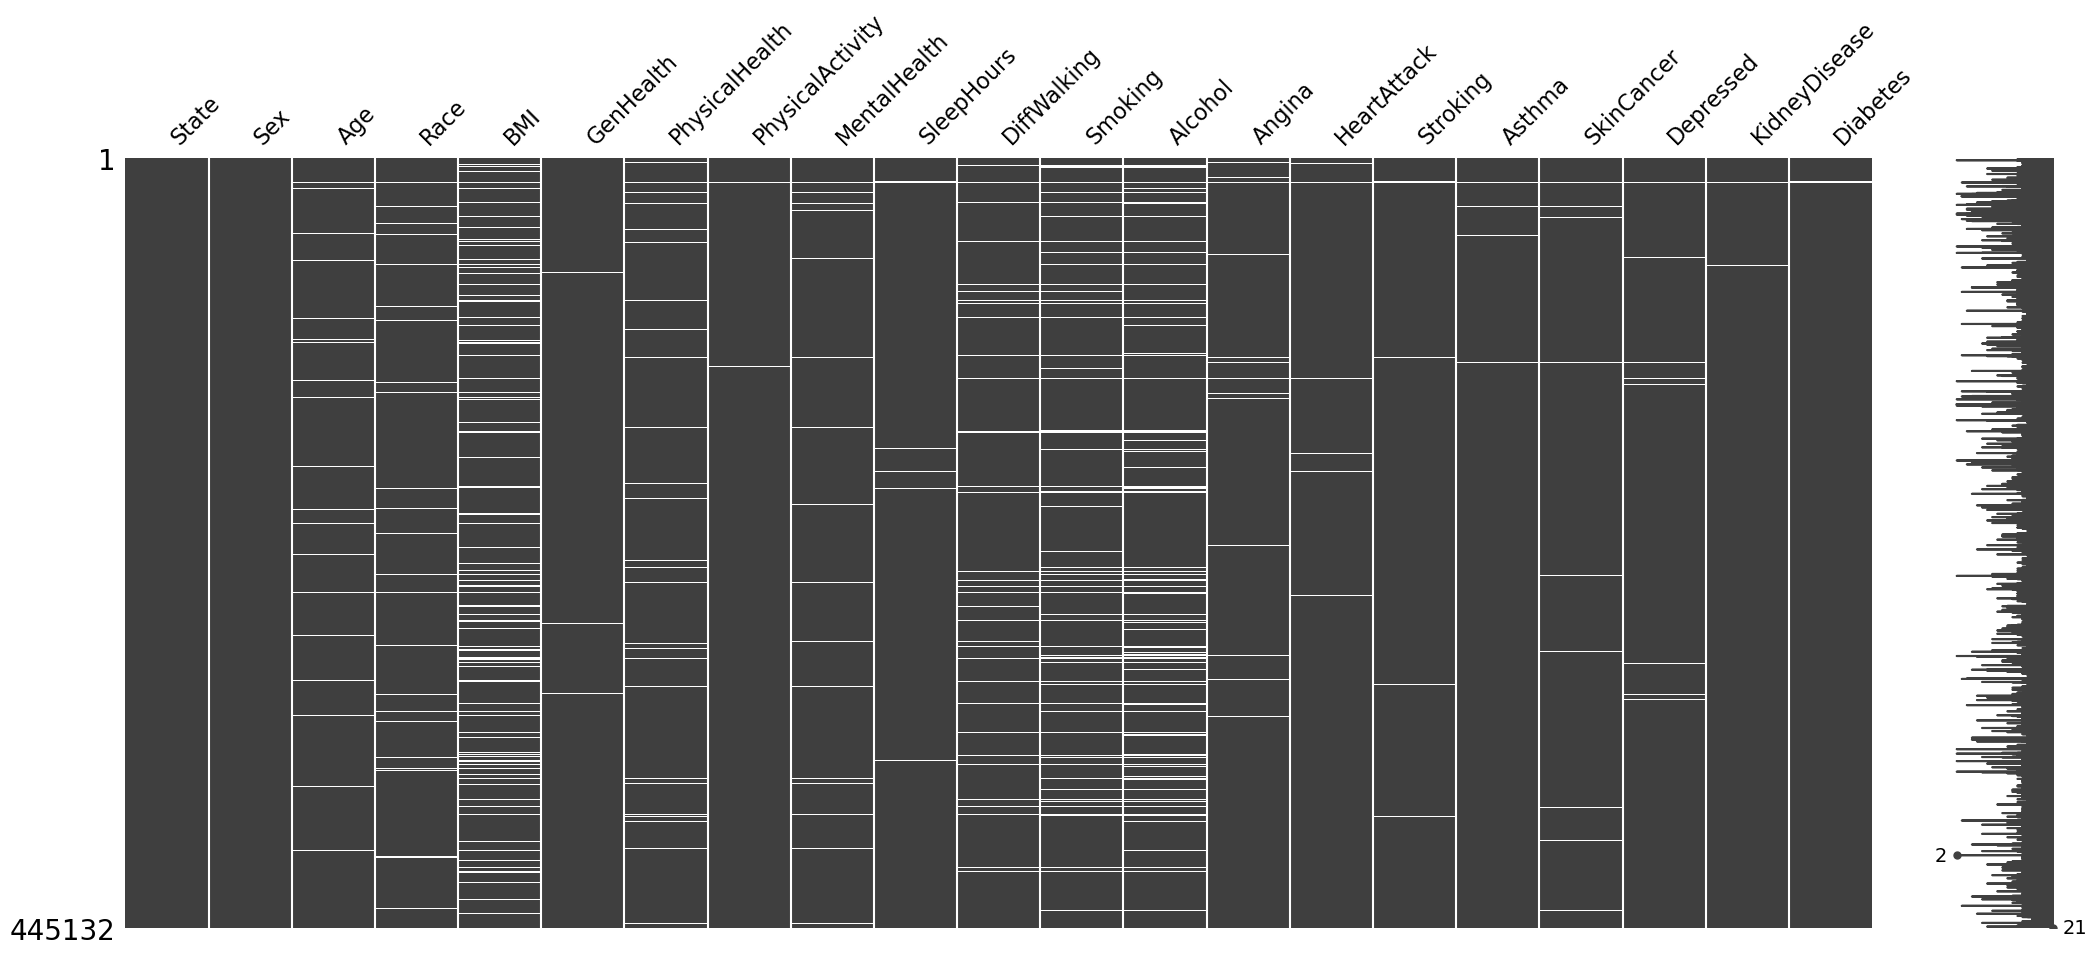

In [12]:
%matplotlib inline
msno.matrix(dropped_df)

In [13]:
# Finding NAN values
nan_values = dropped_df.isna().sum().sort_values(ascending=False)
nan_values_percentage = (nan_values/df.shape[0])*100

# Output the DataFrame with two columns nan_values and nan_values_percentage
pd.concat([nan_values, nan_values_percentage], axis=1).rename(columns= {0:"NaN Values", 1:"(%) of NaN Values"}).round(2)

,NaN Values,(%) of NaN Values
BMI,48806,10.96
Alcohol,46574,10.46
Smoking,35462,7.97
DiffWalking,24012,5.39
Race,14057,3.16
PhysicalHealth,10927,2.45
Age,9079,2.04
MentalHealth,9067,2.04
SleepHours,5453,1.23
Angina,4405,0.99


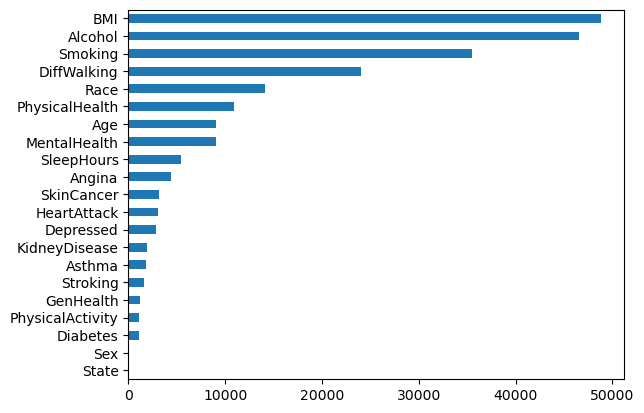

In [14]:
# Plot the distribution of NaN Values
dropped_df.isna().sum().sort_values().plot(kind="barh")
plt.show()

In [15]:
# Remove the missing values
df_dropna = dropped_df.dropna()

# Check again the missing values
df_dropna.isna().sum()

State               0
Sex                 0
Age                 0
Race                0
BMI                 0
GenHealth           0
PhysicalHealth      0
PhysicalActivity    0
MentalHealth        0
SleepHours          0
DiffWalking         0
Smoking             0
Alcohol             0
Angina              0
HeartAttack         0
Stroking            0
Asthma              0
SkinCancer          0
Depressed           0
KidneyDisease       0
Diabetes            0
dtype: int64

In [16]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331757 entries, 1 to 445131
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             331757 non-null  object 
 1   Sex               331757 non-null  object 
 2   Age               331757 non-null  object 
 3   Race              331757 non-null  object 
 4   BMI               331757 non-null  float64
 5   GenHealth         331757 non-null  object 
 6   PhysicalHealth    331757 non-null  float64
 7   PhysicalActivity  331757 non-null  object 
 8   MentalHealth      331757 non-null  float64
 9   SleepHours        331757 non-null  float64
 10  DiffWalking       331757 non-null  object 
 11  Smoking           331757 non-null  object 
 12  Alcohol           331757 non-null  object 
 13  Angina            331757 non-null  object 
 14  HeartAttack       331757 non-null  object 
 15  Stroking          331757 non-null  object 
 16  Asthma            331757 

<Axes: >

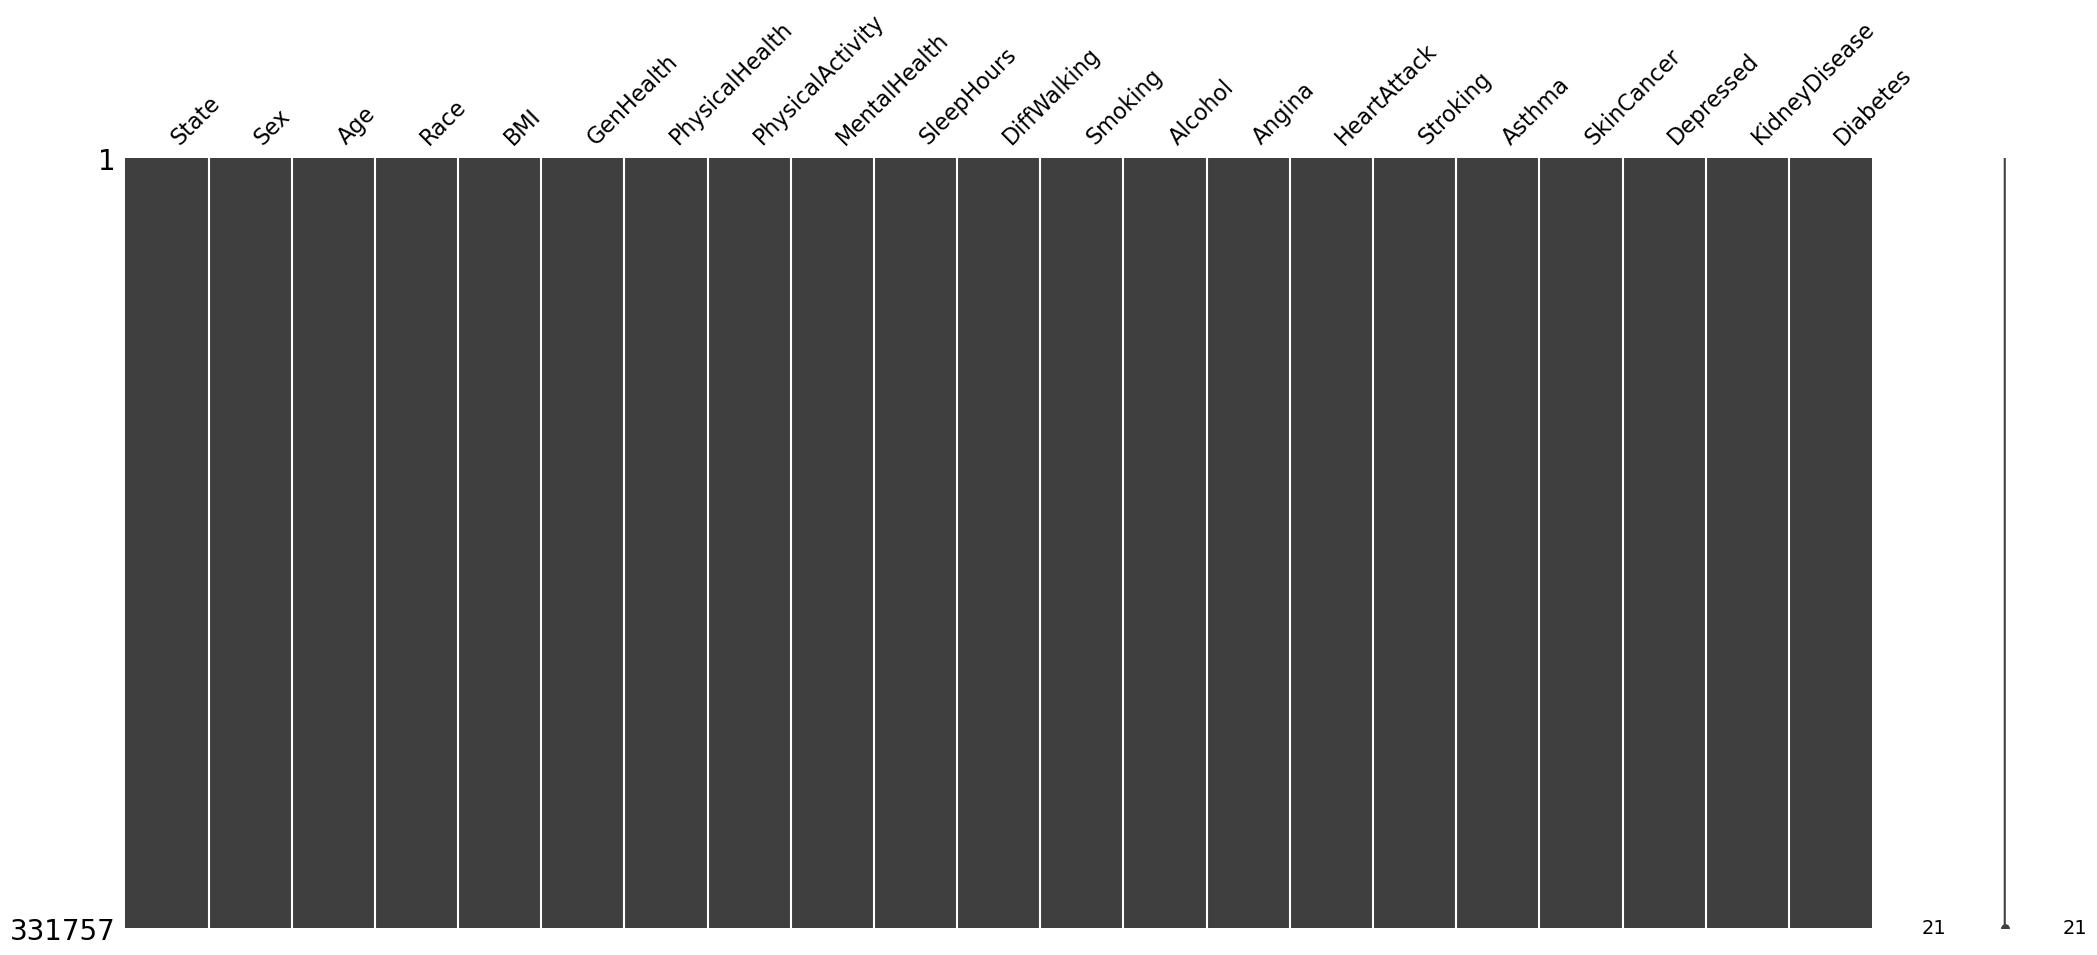

In [17]:
msno.matrix(df_dropna)

In [18]:
# Remove any duplicated values
df_dropdup = df_dropna.drop_duplicates()
df_dropdup

,State,Sex,Age,Race,BMI,GenHealth,PhysicalHealth,PhysicalActivity,MentalHealth,SleepHours,...,Smoking,Alcohol,Angina,HeartAttack,Stroking,Asthma,SkinCancer,Depressed,KidneyDisease,Diabetes
1,Alabama,Female,Age 80 or older,"White only, Non-Hispanic",26.57,Excellent,0.0,No,0.0,6.0,...,Never smoked,No,No,No,No,No,Yes,No,No,No
2,Alabama,Female,Age 55 to 59,"White only, Non-Hispanic",25.61,Very good,2.0,Yes,3.0,5.0,...,Never smoked,No,No,No,No,No,Yes,No,No,No
4,Alabama,Female,Age 40 to 44,"White only, Non-Hispanic",21.77,Fair,2.0,Yes,0.0,9.0,...,Never smoked,Yes,No,No,No,No,No,No,No,No
5,Alabama,Male,Age 80 or older,"White only, Non-Hispanic",26.08,Poor,1.0,No,0.0,7.0,...,Never smoked,No,No,Yes,Yes,No,No,No,No,Yes
6,Alabama,Female,Age 80 or older,"Black only, Non-Hispanic",22.96,Very good,0.0,Yes,0.0,7.0,...,Former smoker,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445124,Virgin Islands,Male,Age 65 to 69,"Multiracial, Non-Hispanic",29.86,Good,0.0,Yes,15.0,7.0,...,Never smoked,Yes,No,No,Yes,No,No,No,No,Yes
445126,Virgin Islands,Male,Age 30 to 34,"White only, Non-Hispanic",31.19,Good,0.0,Yes,0.0,8.0,...,Never smoked,Yes,No,No,No,No,No,No,No,No
445128,Virgin Islands,Female,Age 50 to 54,"Black only, Non-Hispanic",28.66,Excellent,2.0,Yes,2.0,7.0,...,Never smoked,No,No,No,No,No,No,No,No,No
445130,Virgin Islands,Male,Age 70 to 74,"Black only, Non-Hispanic",32.55,Very good,0.0,No,0.0,5.0,...,Never smoked,No,No,Yes,No,Yes,No,No,No,No


In [19]:
df_dropdup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331351 entries, 1 to 445131
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             331351 non-null  object 
 1   Sex               331351 non-null  object 
 2   Age               331351 non-null  object 
 3   Race              331351 non-null  object 
 4   BMI               331351 non-null  float64
 5   GenHealth         331351 non-null  object 
 6   PhysicalHealth    331351 non-null  float64
 7   PhysicalActivity  331351 non-null  object 
 8   MentalHealth      331351 non-null  float64
 9   SleepHours        331351 non-null  float64
 10  DiffWalking       331351 non-null  object 
 11  Smoking           331351 non-null  object 
 12  Alcohol           331351 non-null  object 
 13  Angina            331351 non-null  object 
 14  HeartAttack       331351 non-null  object 
 15  Stroking          331351 non-null  object 
 16  Asthma            331351 

## Since, some categorical attributes are overlapping --> Cleaning Needed

In [20]:
# Check the "Race" category
unique_race = df_dropdup["Race"].value_counts()
print(unique_race)

Race
White only, Non-Hispanic         250886
Hispanic                          30982
Black only, Non-Hispanic          25190
Other race only, Non-Hispanic     16793
Multiracial, Non-Hispanic          7500
Name: count, dtype: int64


In [21]:
# Define re-names
rename_race = {
    "White only, Non-Hispanic": "White",
    "Black only, Non-Hispanic" : "Black",
    "Other race only, Non-Hispanic": "Other",
    "Multiracial, Non-Hispanic": "Multiracial"
}

# Replace values in the "Race" column
df_dropdup["Race"] = df_dropdup["Race"].replace(rename_race)
print(df_dropdup["Race"].value_counts())

Race
White          250886
Hispanic        30982
Black           25190
Other           16793
Multiracial      7500
Name: count, dtype: int64


In [22]:
# Check the "Age" category
print(df_dropdup["Age"].value_counts())

Age
Age 65 to 69       36306
Age 60 to 64       34052
Age 70 to 74       33293
Age 55 to 59       28311
Age 50 to 54       25849
Age 80 or older    25351
Age 75 to 79       24326
Age 40 to 44       23043
Age 45 to 49       21890
Age 35 to 39       21758
Age 18 to 24       20800
Age 30 to 34       19442
Age 25 to 29       16930
Name: count, dtype: int64


In [23]:
df_dropdup["Age"] = (df_dropdup["Age"]
                     .str.replace(" to ", "-")
                     .str.replace("Age ", ""))

print(df_dropdup["Age"].value_counts())

Age
65-69          36306
60-64          34052
70-74          33293
55-59          28311
50-54          25849
80 or older    25351
75-79          24326
40-44          23043
45-49          21890
35-39          21758
18-24          20800
30-34          19442
25-29          16930
Name: count, dtype: int64


In [24]:
# Check unique values of Diabetes
print(df_dropdup["Diabetes"].value_counts())

Diabetes
No                                         276733
Yes                                         44364
No, pre-diabetes or borderline diabetes      7486
Yes, but only during pregnancy (female)      2768
Name: count, dtype: int64


In [25]:
rename_diabetes = {
    "No, pre-diabetes or borderline diabetes": "No, borderline diabetes",
    "Yes, but only during pregnancy (female)": "Yes, during pregnancy"
}
df_dropdup["Diabetes"] = df_dropdup["Diabetes"].replace(rename_diabetes)

# Check again
# Check unique values of Diabetes
print(df_dropdup["Diabetes"].value_counts())

Diabetes
No                         276733
Yes                         44364
No, borderline diabetes      7486
Yes, during pregnancy        2768
Name: count, dtype: int64


In [26]:
df_dropdup.describe()

,BMI,PhysicalHealth,MentalHealth,SleepHours
count,331351.000000,331351.000000,331351.000000,331351.000000
mean,28.567236,4.167566,4.318620,7.024964
std,6.515336,8.453864,8.231515,1.445796
min,12.020000,0.000000,0.000000,1.000000
25%,24.170000,0.000000,0.000000,6.000000
50%,27.440000,0.000000,0.000000,7.000000
75%,31.750000,3.000000,5.000000,8.000000
max,97.650000,30.000000,30.000000,24.000000


In [27]:
df_dropdup.describe(include="object")

,State,Sex,Age,Race,GenHealth,PhysicalActivity,DiffWalking,Smoking,Alcohol,Angina,HeartAttack,Stroking,Asthma,SkinCancer,Depressed,KidneyDisease,Diabetes
count,331351,331351,331351,331351,331351,331351,331351,331351,331351,331351,331351,331351,331351,331351,331351,331351,331351
unique,54,2,13,5,5,2,2,4,2,2,2,2,2,2,2,2,4
top,Washington,Female,65-69,White,Very good,Yes,No,Never smoked,Yes,No,No,No,No,No,No,No,No
freq,19632,170452,36306,250886,116342,256869,282497,199671,182317,311616,313658,317850,281717,303801,261771,316580,276733


In [28]:
# Print out all description by columns
# Use FOR loop to iterate over columns

for col in df_dropdup.describe(include="object").columns:
    print("Column Name:" , col)
    print(df_dropdup[col].unique())
    print("____________________________________")

Column Name: State
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
____________________________________
Column Name: Sex
['Female' 'Male']
____________________________________
Column Name: Age
['80 or older' '55-59' '40-44' '70-74' '65-69' '60-64' '75-79' '50-54'
 '45-49' '35-39' '30-34' '25-29' '18-24']
____________________________________
Column Name: Race
['White' 'Black' 'Other' 'Multiracial' 'His

In [29]:
df_dropdup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331351 entries, 1 to 445131
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             331351 non-null  object 
 1   Sex               331351 non-null  object 
 2   Age               331351 non-null  object 
 3   Race              331351 non-null  object 
 4   BMI               331351 non-null  float64
 5   GenHealth         331351 non-null  object 
 6   PhysicalHealth    331351 non-null  float64
 7   PhysicalActivity  331351 non-null  object 
 8   MentalHealth      331351 non-null  float64
 9   SleepHours        331351 non-null  float64
 10  DiffWalking       331351 non-null  object 
 11  Smoking           331351 non-null  object 
 12  Alcohol           331351 non-null  object 
 13  Angina            331351 non-null  object 
 14  HeartAttack       331351 non-null  object 
 15  Stroking          331351 non-null  object 
 16  Asthma            331351 

In [30]:
df_dropdup.to_csv("Resources/heart_2022_cleaned.csv", index=False)

# Exploratory Data Analysis (EDA)

In [31]:
# Copy df_dropdup to df_train
df_cleaned = df_dropdup.copy()

In [32]:
df_cleaned.shape

(331351, 21)

### By Genders

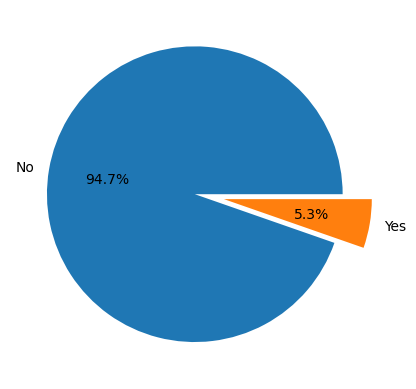

In [33]:
# Plotting Heart Attack distribution
heart_attack_rate = df_cleaned["HeartAttack"].value_counts()
plt.pie(
    heart_attack_rate.values, 
    labels = heart_attack_rate.index,
    autopct = "%.1f%%", 
    explode = [0, 0.2]
    )
plt.show()

### Heart Attack Among Genders

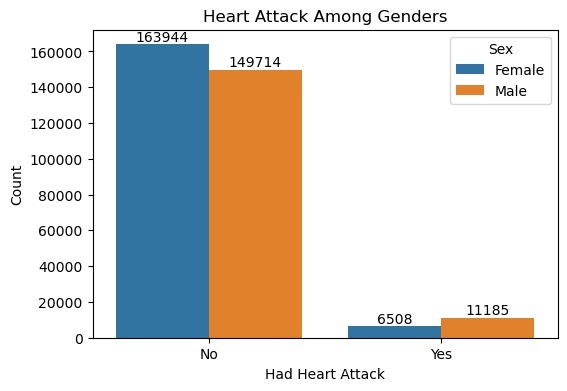

In [34]:
# Set figure styles
plt.figure(figsize=(6,4))

#Plot countplot
ax = sns.countplot(data=df_cleaned, x="HeartAttack", hue="Sex")

# Customize plot
ax.set(
    xlabel = "Had Heart Attack",
    ylabel = "Count",
    title = "Heart Attack Among Genders"
)

# Add labels to bars
for container in ax.containers:
        ax.bar_label(container)

# Display the plot
plt.show()

### risk and Risk Factors Among Genders

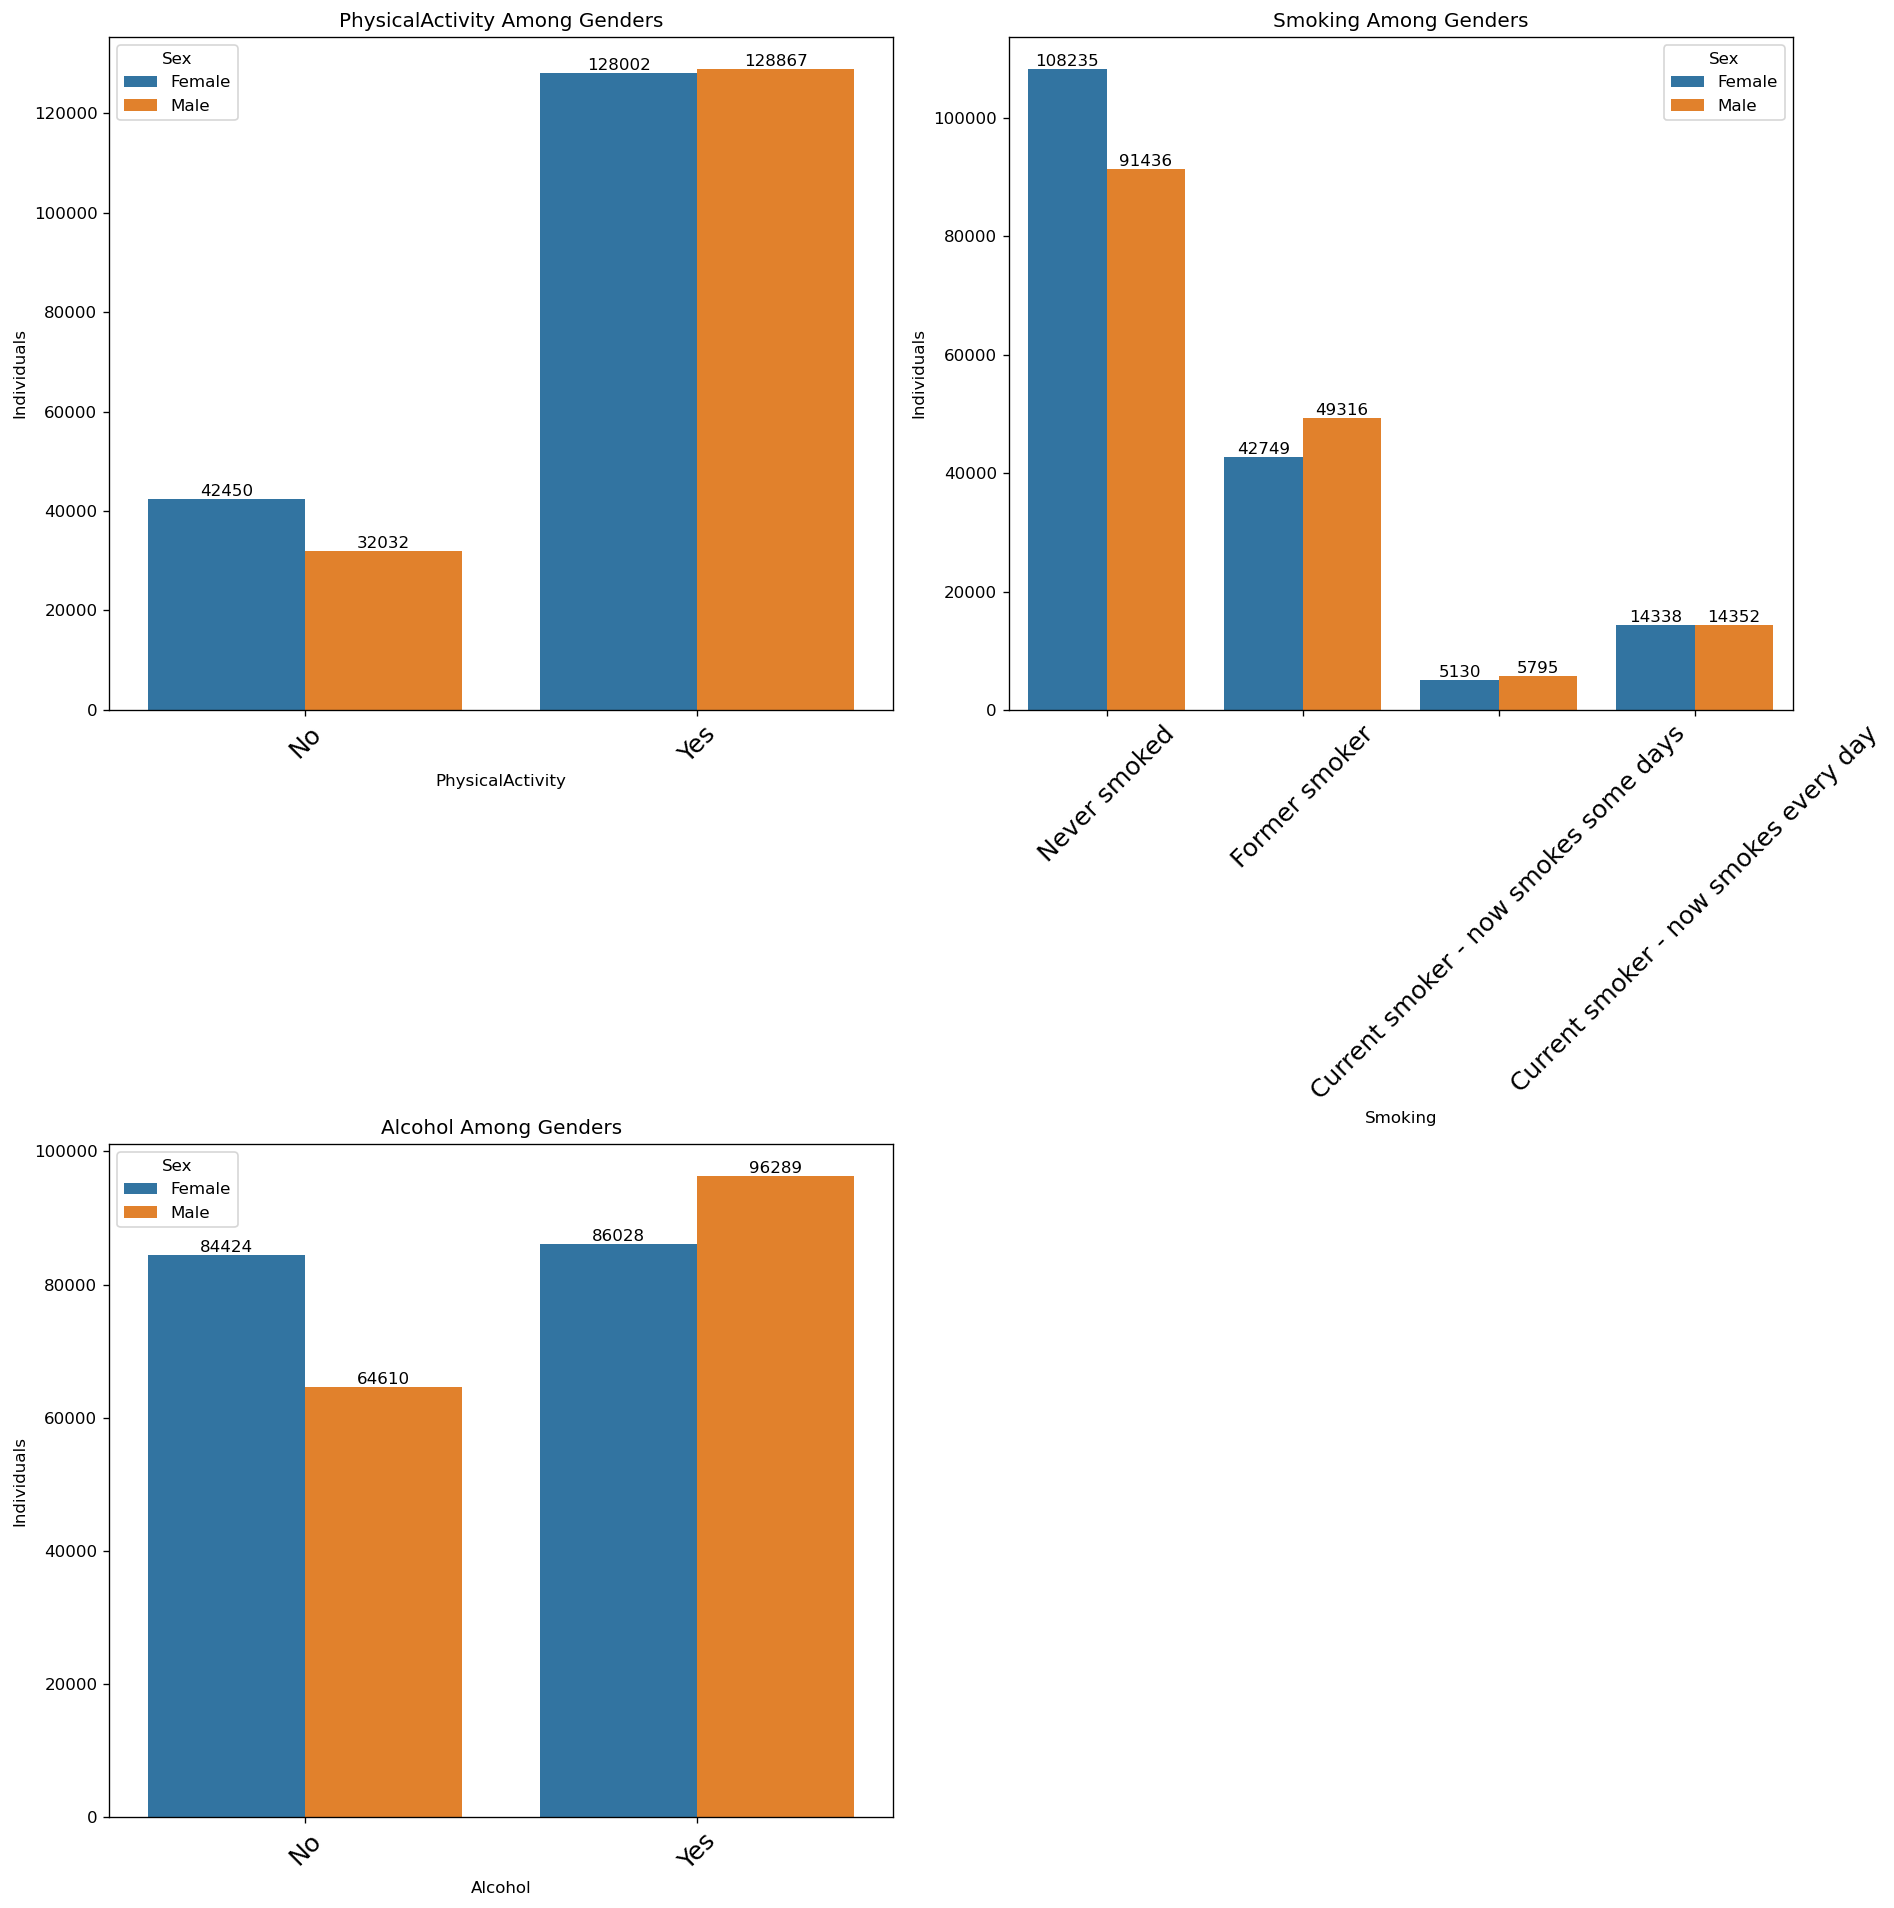

In [35]:
# Set up the figure size and resolution
plt.figure(figsize=(16, 16), dpi=120)

# List of risk factors to plot
risk_factors = ['PhysicalActivity', 'Smoking', 'Alcohol']

# Loop through risk factors and create subplots
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(data=df_cleaned, x=risk_factor, hue='Sex')
    ax.set(
        title=f"{risk_factor} Among Genders", 
        xlabel=risk_factor, 
        ylabel="Individuals"
        )
    ax.tick_params(axis='x', rotation=45, labelsize=15)
    
    # Add labels to bars
    for container in ax.containers:
        ax.bar_label(container)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

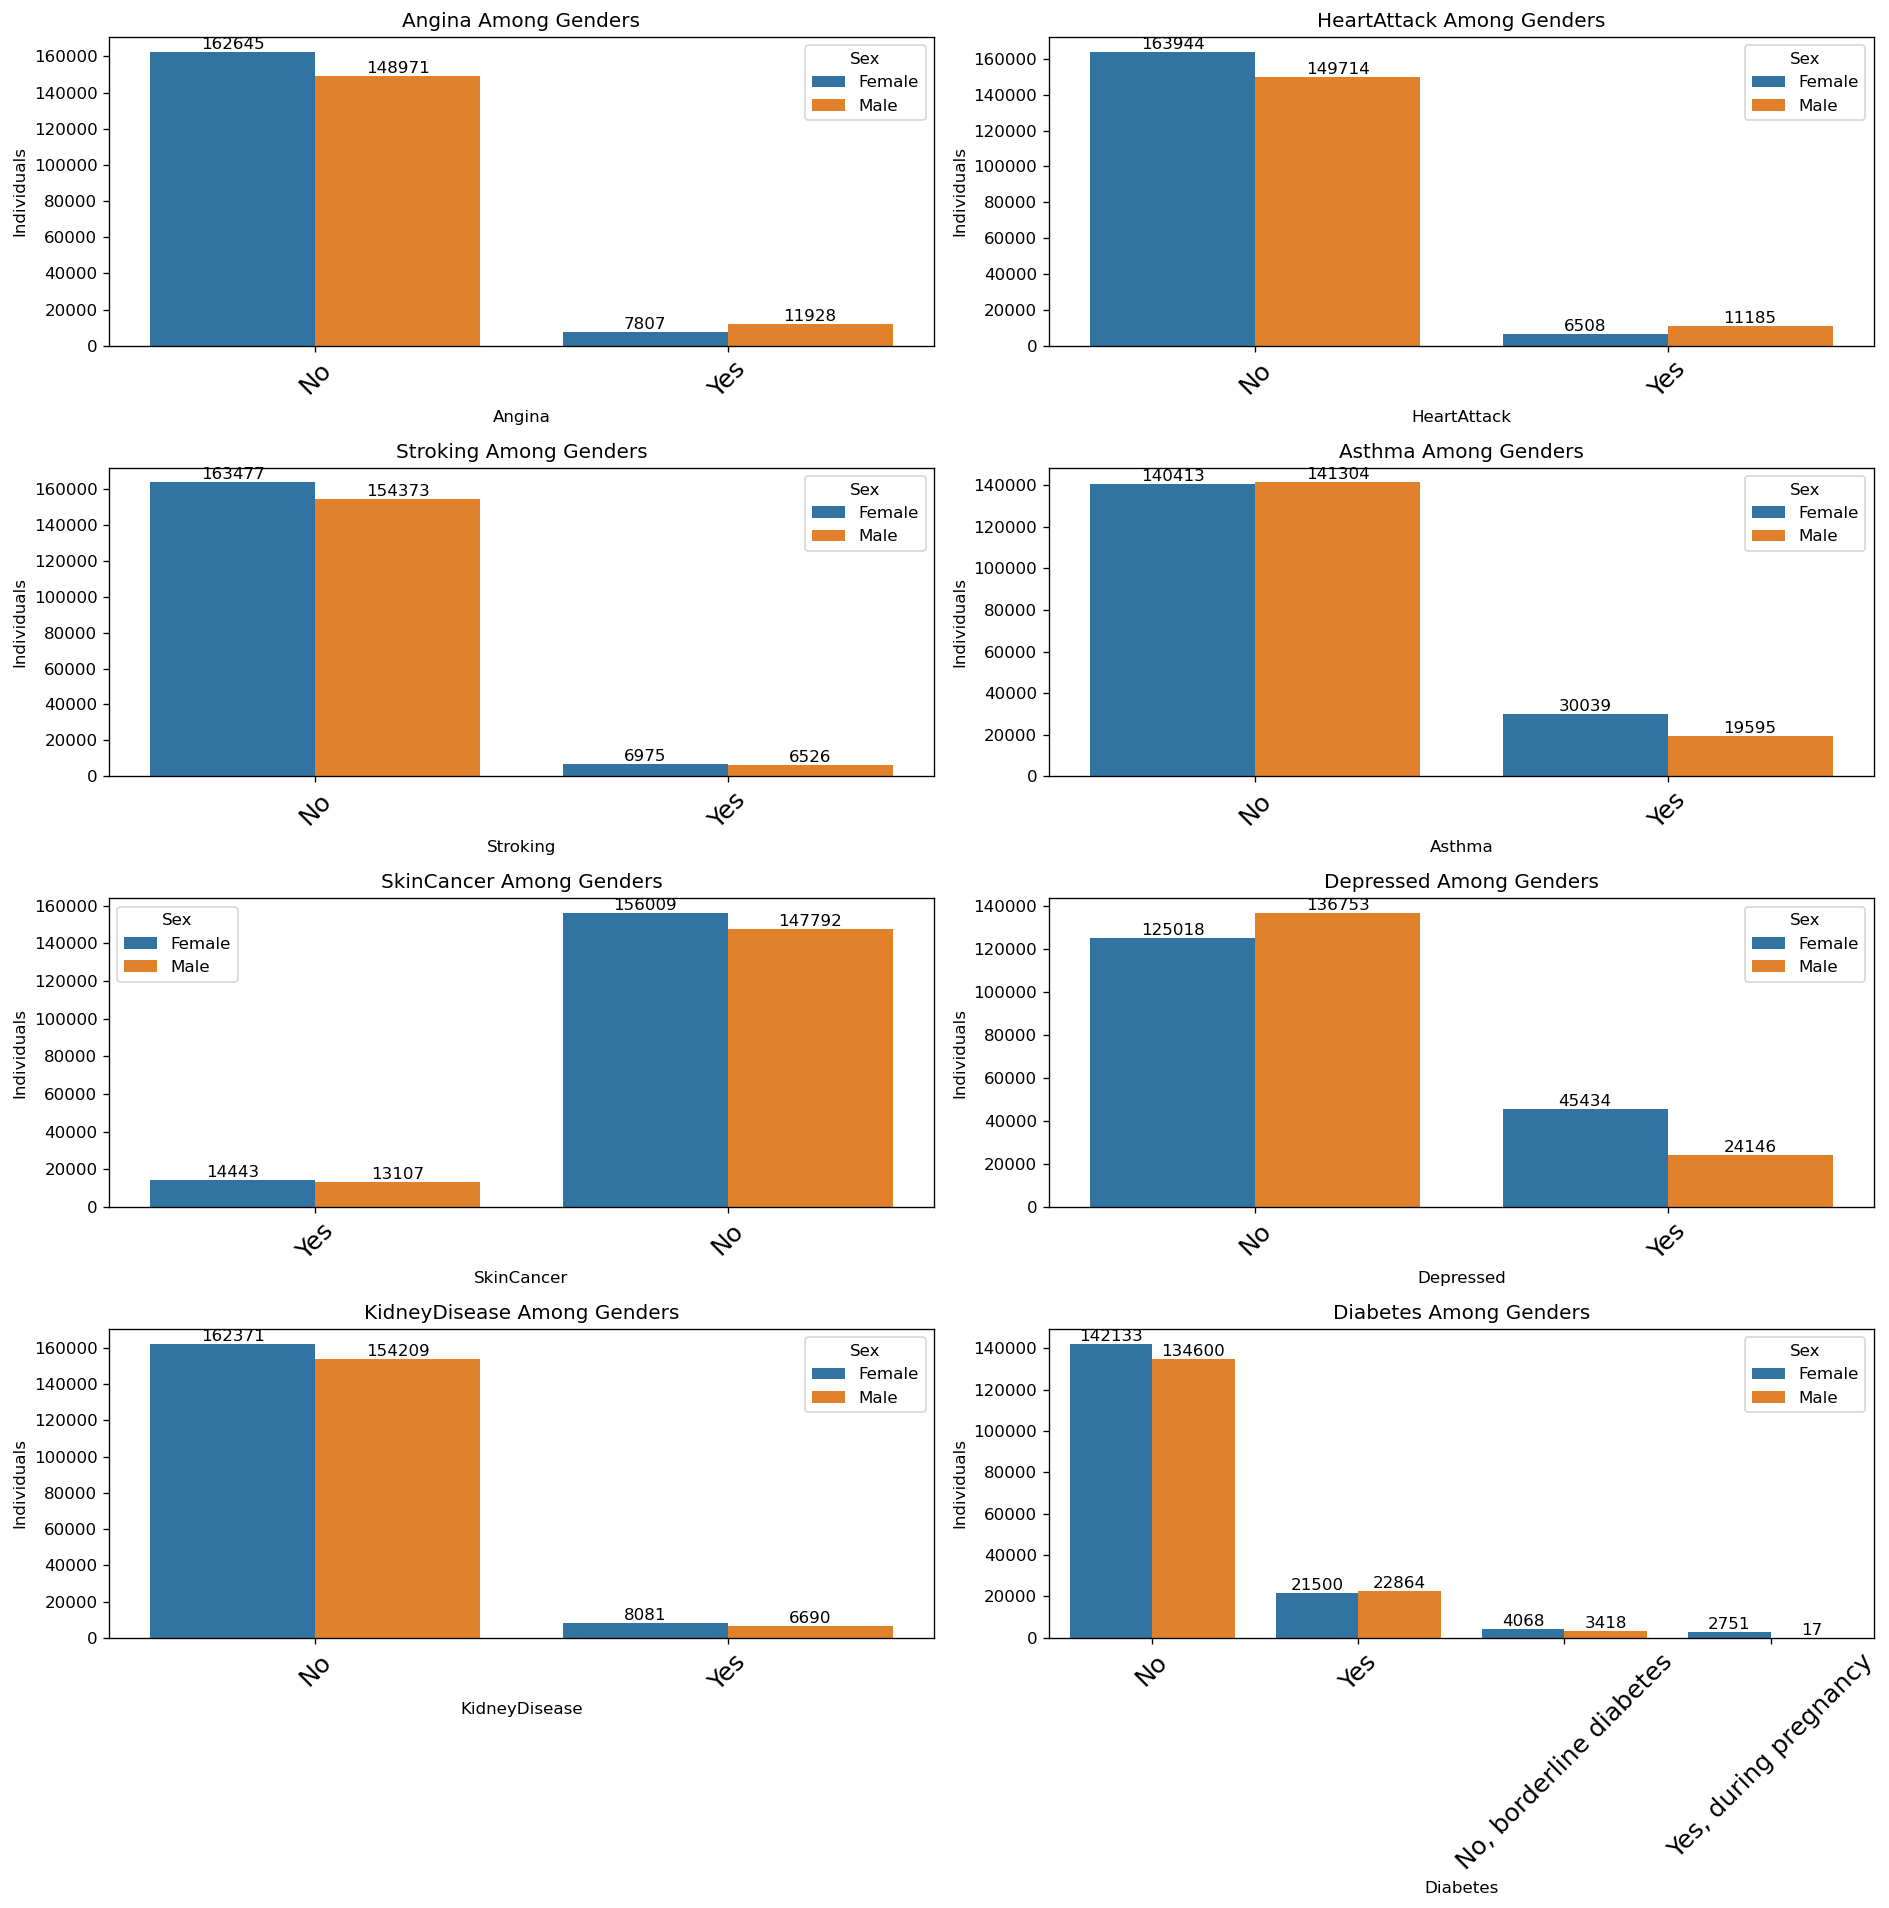

In [36]:
# Set up the figure size and resolution
plt.figure(figsize=(16, 16), dpi=120)

# List of risk factors to plot
risk_factors = ['Angina', 'HeartAttack',  'Stroking', 'Asthma',
        'SkinCancer', 'Depressed', 'KidneyDisease','Diabetes']

# Loop through risk factors and create subplots
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(4, 2, i)
    ax = sns.countplot(data=df_cleaned, x=risk_factor, hue='Sex')
    ax.set(
        title=f"{risk_factor} Among Genders", 
        xlabel=risk_factor, 
        ylabel="Individuals"
        )
    ax.tick_params(axis='x', rotation=45, labelsize=15)
    
    # Add labels to bars
    for container in ax.containers:
        ax.bar_label(container)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### By Age Groups

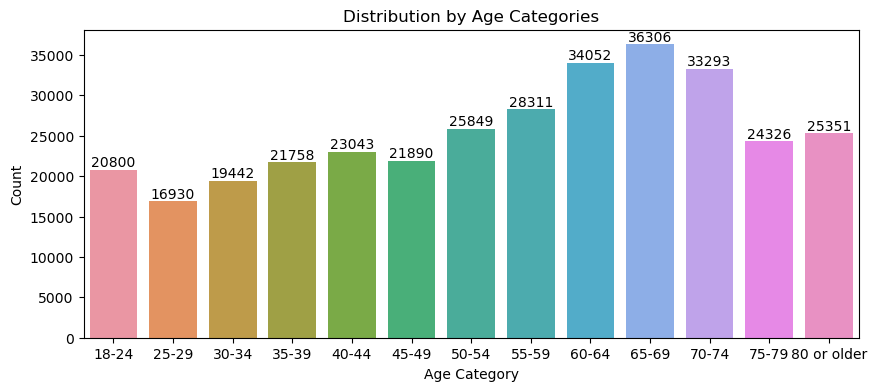

In [41]:
# Set figure styles
plt.figure(figsize=(10,4))

#Plot countplot
ax = sns.countplot(
    data=df_cleaned, 
    x="Age", 
    order = sorted(df_cleaned["Age"].unique())
    )

# Customize plot
ax.set(
    xlabel = "Age Category",
    ylabel = "Count",
    title = "Distribution by Age Categories"
)

# Add labels to bars
for container in ax.containers:
        ax.bar_label(container)

# Display the plot
plt.show()

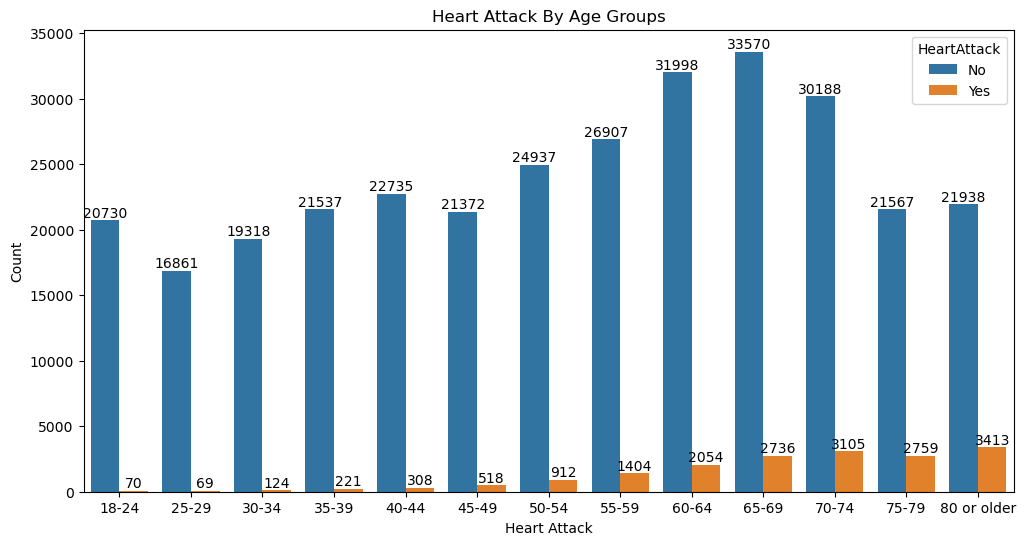

In [44]:
# Set figure styles
plt.figure(figsize=(12,6))

#Plot countplot
ax = sns.countplot(
    data=df_cleaned, 
    x="Age", 
    hue="HeartAttack",
    order = sorted(df_cleaned["Age"].unique())
    )

# Customize plot
ax.set(
    xlabel = "Heart Attack",
    ylabel = "Count",
    title = "Heart Attack By Age Groups"
)

# Add labels to bars
for container in ax.containers:
        ax.bar_label(container)

# Display the plot
plt.show()

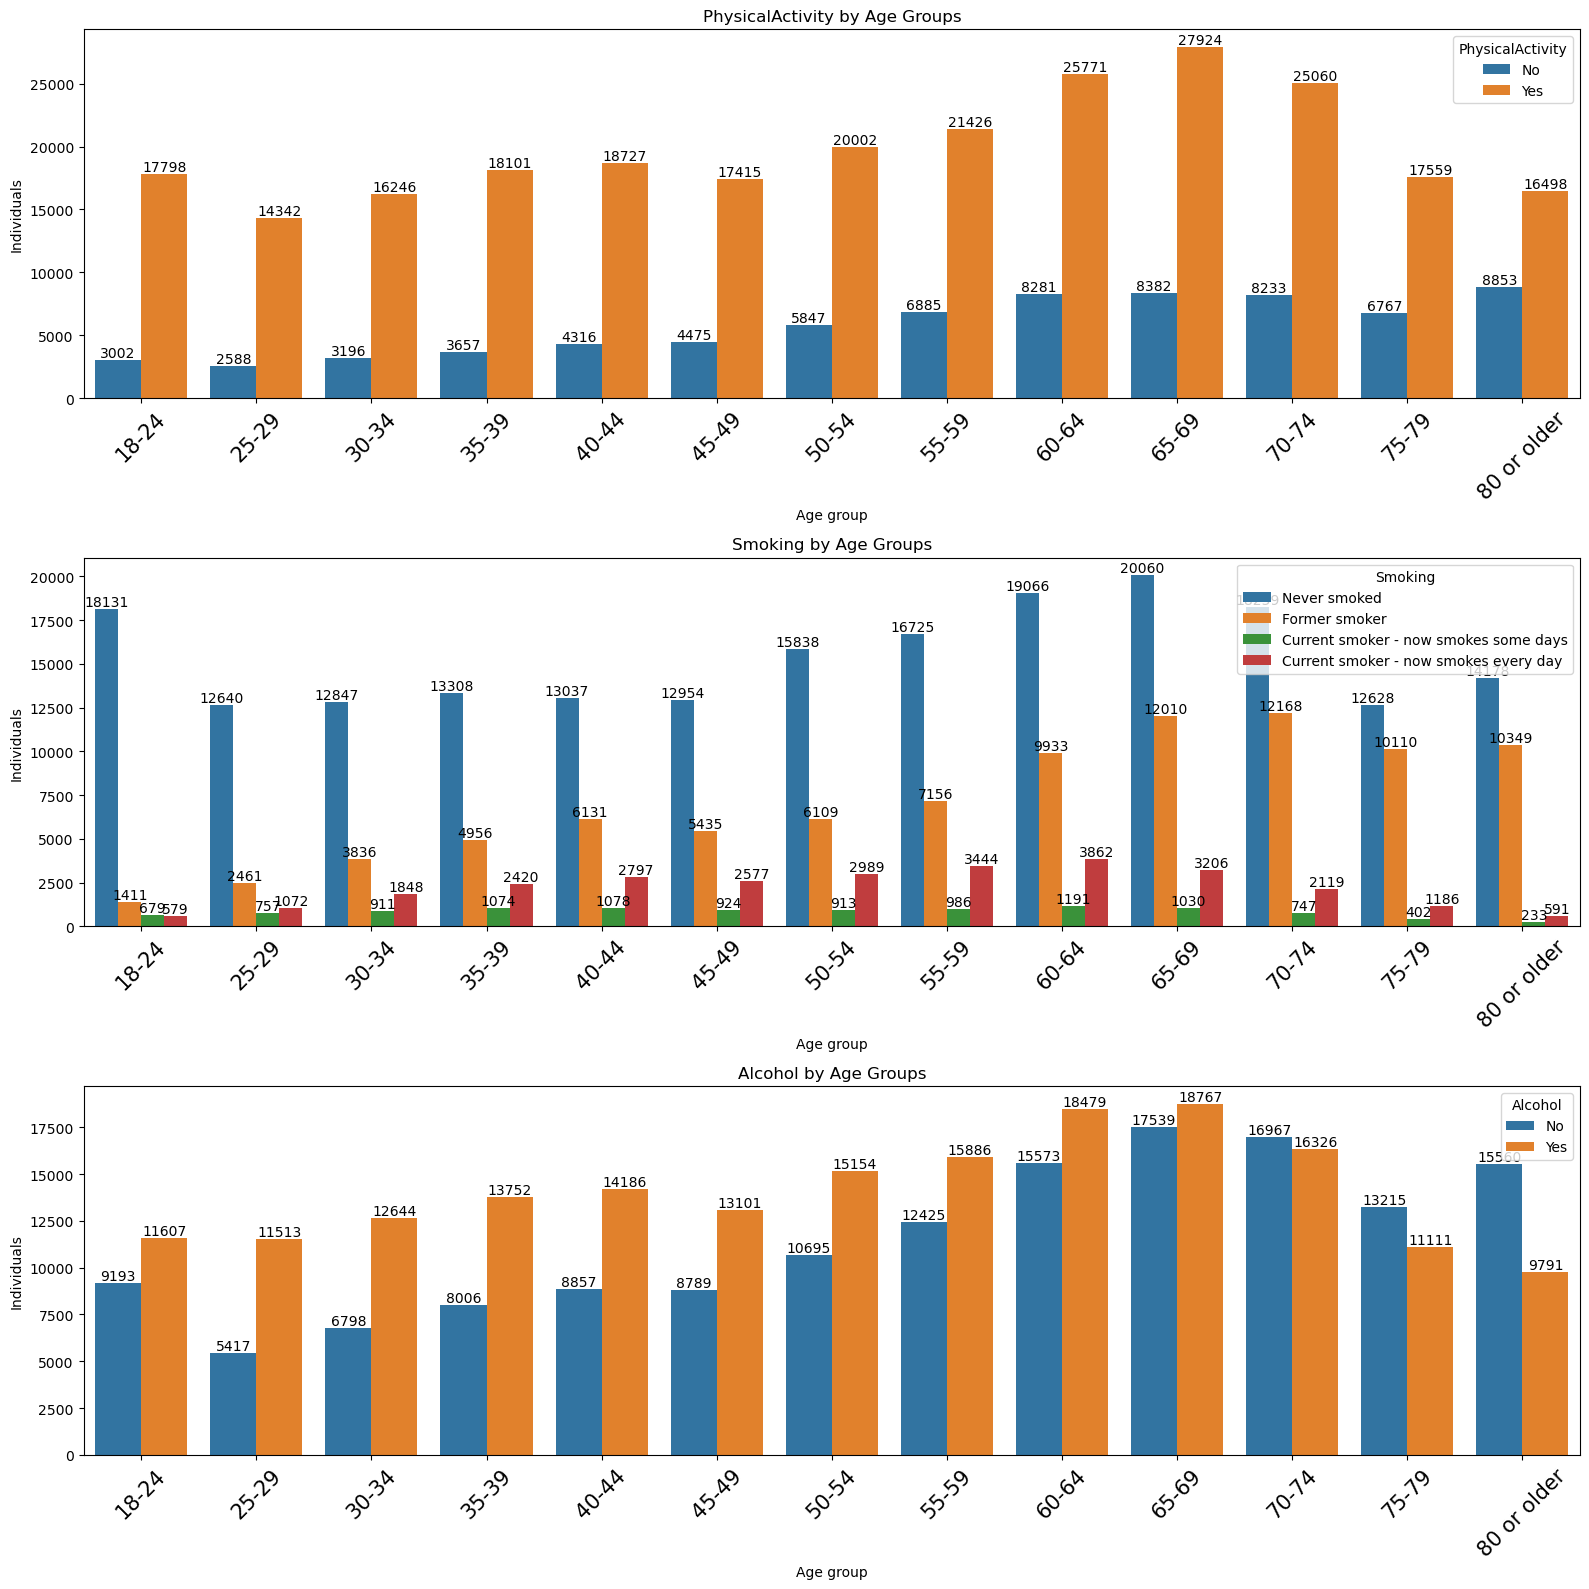

In [49]:
# Set up the figure size and resolution
plt.figure(figsize=(16, 16))

# List of risk factors to plot
risk_factors = ['PhysicalActivity', 'Smoking', 'Alcohol']

# Loop through risk factors and create subplots
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(3, 1, i)
    ax = sns.countplot(
        data=df_cleaned, 
        x="Age", 
        hue=risk_factor,
        order = sorted(df_cleaned["Age"].unique())
        )
    ax.set(
        title=f"{risk_factor} by Age Groups", 
        xlabel="Age group", 
        ylabel="Individuals"        
        )
    ax.tick_params(axis='x', rotation=45, labelsize=15)
    
    # Add labels to bars
    for container in ax.containers:
        ax.bar_label(container)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

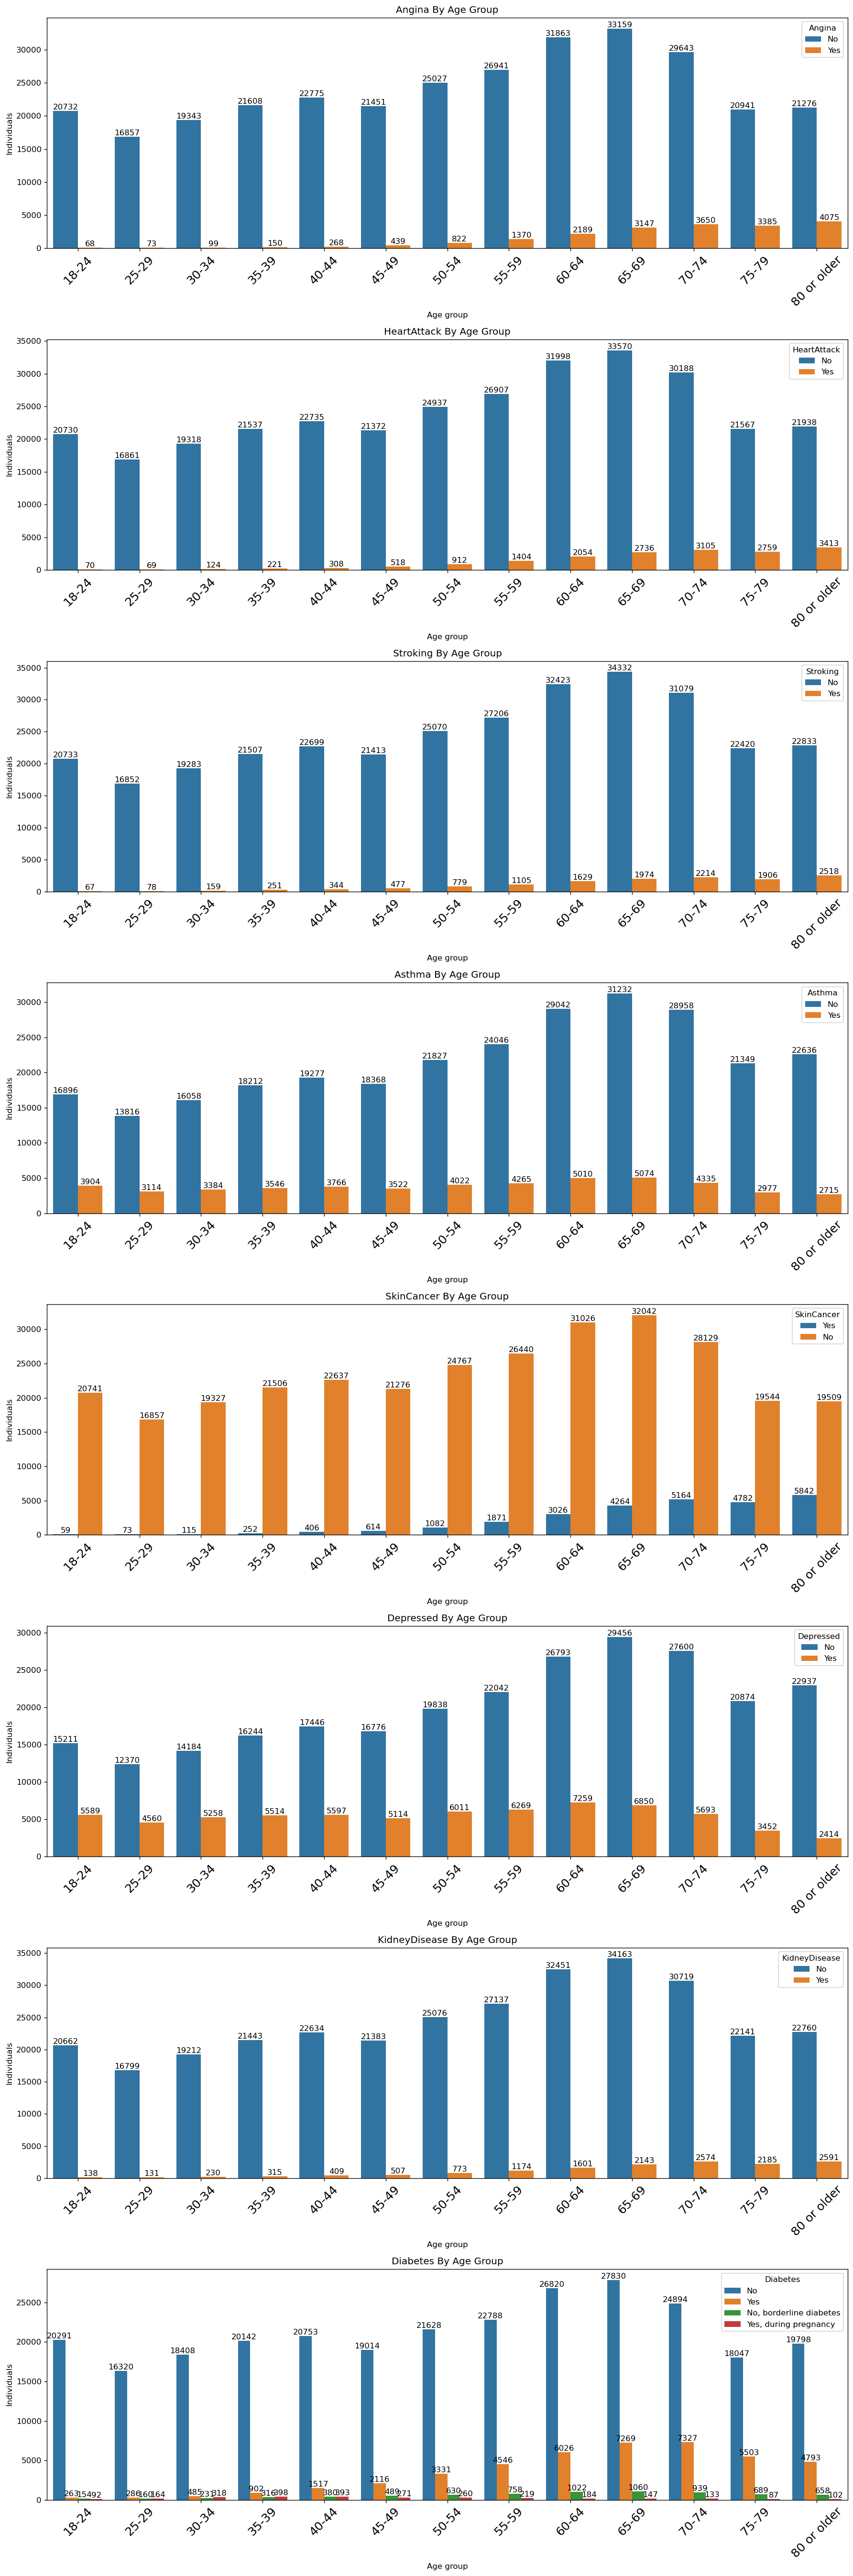

In [53]:
# Set up the figure size and resolution
plt.figure(figsize=(15, 45), dpi=120)

# List of risk factors to plot
risk_factors = ['Angina', 'HeartAttack',  'Stroking', 'Asthma',
        'SkinCancer', 'Depressed', 'KidneyDisease','Diabetes']

# Loop through risk factors and create subplots
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(8, 1, i)
    ax = sns.countplot(
        data=df_cleaned, 
        x="Age", 
        hue=risk_factor, 
        order = sorted(df_cleaned["Age"].unique())
        )
    ax.set(
        title=f"{risk_factor} By Age Group", 
        xlabel="Age group", 
        ylabel="Individuals"
        )
    ax.tick_params(axis='x', rotation=45, labelsize=15)
    
    # Add labels to bars
    for container in ax.containers:
        ax.bar_label(container)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [54]:
df_cleaned.describe()

,BMI,PhysicalHealth,MentalHealth,SleepHours
count,331351.000000,331351.000000,331351.000000,331351.000000
mean,28.567236,4.167566,4.318620,7.024964
std,6.515336,8.453864,8.231515,1.445796
min,12.020000,0.000000,0.000000,1.000000
25%,24.170000,0.000000,0.000000,6.000000
50%,27.440000,0.000000,0.000000,7.000000
75%,31.750000,3.000000,5.000000,8.000000
max,97.650000,30.000000,30.000000,24.000000


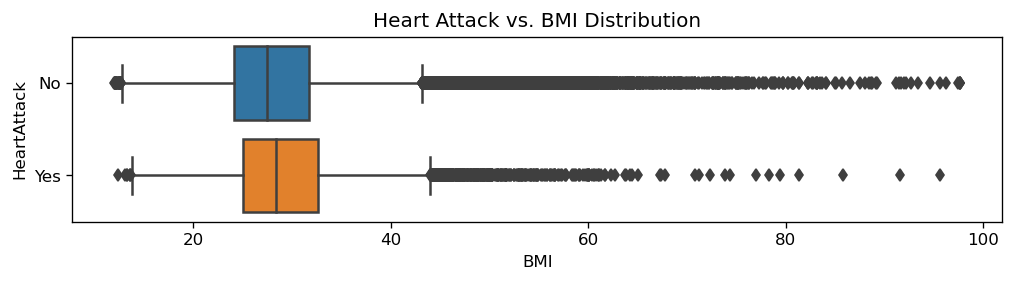

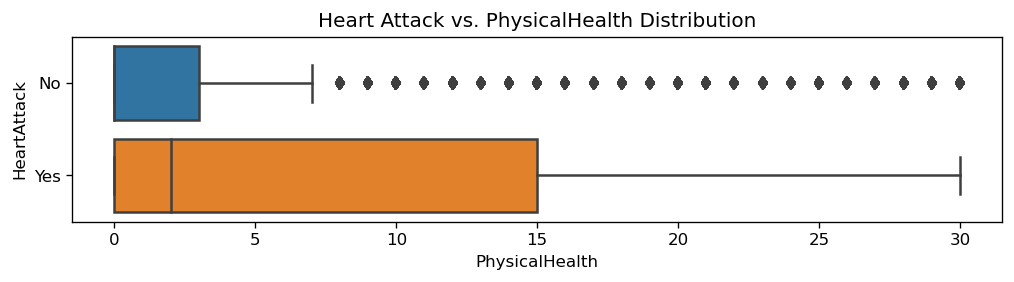

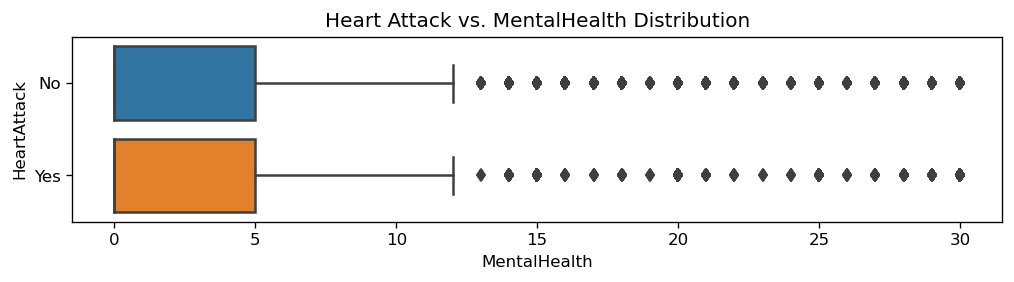

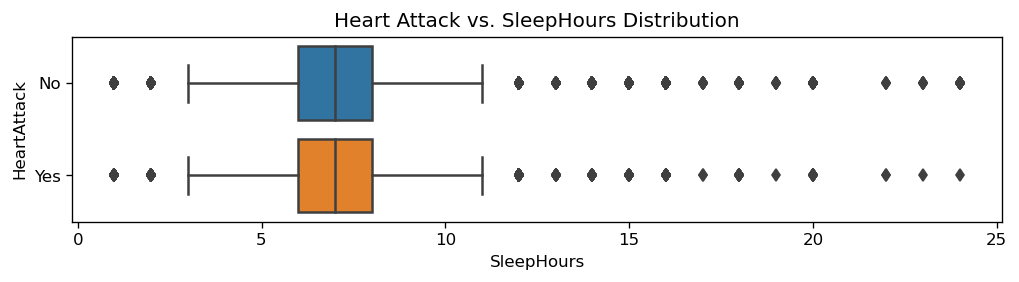

In [58]:
for column in df_cleaned.describe().columns:
    plt.figure(figsize=(10, 2), dpi=120)
    sns.boxplot(data=df_cleaned, x=column, y="HeartAttack")
    plt.title(f"Heart Attack vs. {column} Distribution")
    plt.show()

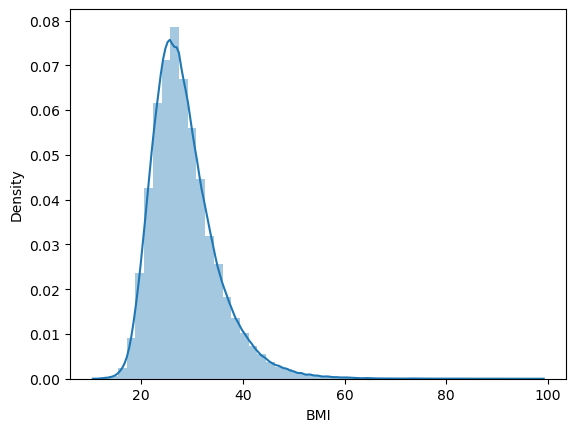

In [59]:
sns.distplot(df_cleaned["BMI"])
plt.show()

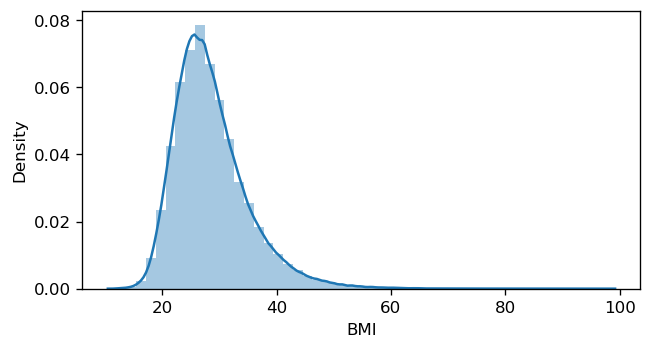

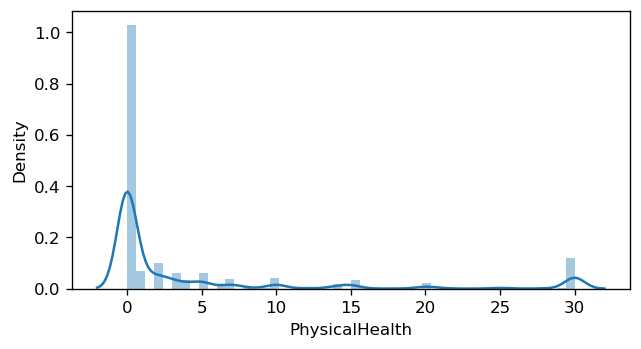

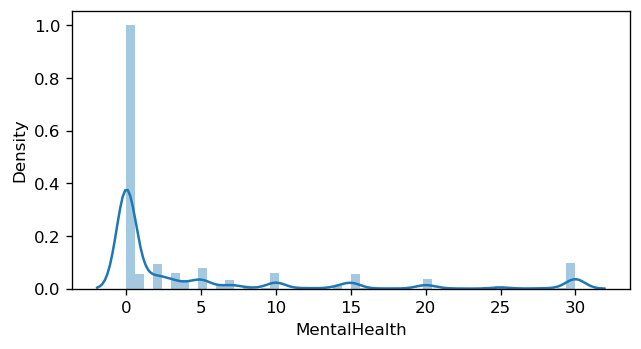

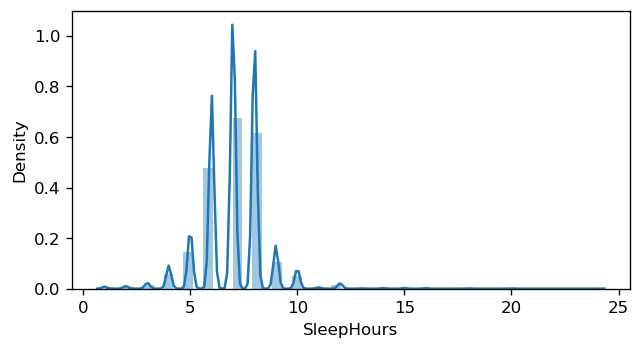

In [64]:
for column in df_cleaned.describe().columns:
    plt.figure(figsize=(6, 3), dpi=120)
    sns.distplot(df_cleaned[column])
    plt.show()